## Problem
Given an integer n, count the number of its divisors.

In [74]:
# Solution 1
def count_divisors1(n):
    count = 0
    d=1
    while d <= n:
        if n%d == 0:
            count +=1
        d+=1
    return count

In [75]:
# Solution 2
def count_divisors2(n):
    d = 1
    count = 0
    while d*d <= n:
        if n%d == 0:
            count+= 1 if n/d == d else 2
        d+=1
    return count

## Introduction

1 - Describe solution 1 : 

The function begins by initializing a variable 'count' and a divisor 'd' equal to 1. While 'd' is less than 'n', it checks whether 'd' divides 'n'. If so, it increments the value of the counter 'count'. Otherwise, it increments the value of the divisor 'd' to check the next divisor 'd+1'.

2- Describe the solution 2 :

The secocnd fucntion calculates the number of divisors of an input number 'n' and it return the number of its devisors 'count'. It is designed to be faster than other methods by only checking up to the square root of the input number

3 -  Run the two programs for different values of n and measure which algorithm is faster

In [76]:
%timeit count_divisors1(1000000)

83.1 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
%timeit count_divisors2(1000000)

106 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


4-  Calculate the number of operations executed by each of the programs for different 
values of n and generalize for any n.

count_divisors1(n) executes approximately 2n+k operations.

count_divisors2(n) executes approximately 2sqrt(n)+k operations for non-perfect squares, and approximately 2sqrt(n) operations for perfect squares.

## Big O notation

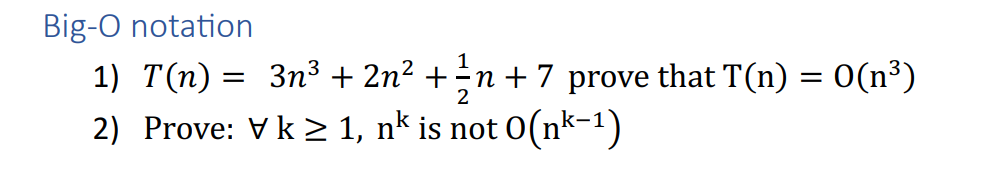

1 - Let's consider n >= 1. We can write:

T(n) = 3n^3 + 2n^2 + 1/2n + 7
<= 3n^3 + 2n^3 + n^3 + n^3 (since n^3 >= 2n^2, n^3 >= 1/2n, and n^3 >= 7 for n >= 1)
<= 7n^3

Therefore, we can choose c = 7 and k = 1. Then, for all n > 1, we have:


T(n) <= 7n^3 <= c * n^3

Hence, we have shown that T(n) = O(n^3)

2 - Similar to the question 1 we devide by $n^{k-1}$  


$\frac{T(n)}{n^{k-1}} = \frac{n^k}{n^{k-1}} = n$ which is not a constant then $n^k$ is not $O(n^{k-1})$

## Merge sort

 Given two sorted arrays, write a function (with a language of your choice) that merge 
the two arrays into a single sorted array

In [78]:
def merge_sort(A,B):
    C = []
    i = 0
    j = 0
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            C.append(A[i])
            i += 1
        else :
            C.append(B[j])
            j += 1

    while i < len(A):
        C.append(A[i])
        i += 1

    while j < len(B):
        C.append(B[j])
        j += 1
    return C
 

In [79]:
A = [1,2,3,6,8]
B = [4,5,10]

In [80]:
merge_sort(A,B)

[1, 2, 3, 4, 5, 6, 8, 10]

 Analyse the complexity of your function using Big-O notation.

the time complexity of the merge_sort function is O(m+n) where m and n are the lengths of the input arrays, which is linear in the combined size of the input arrays. 

## The master method

1 - Using the master method analyse the complexity of merge sort

The time complexity of merge sort can be expressed as T(n) = 2T(n/2) + O(n), where T(n/2) is the time complexity of sorting each subarray, and O(n) is the time complexity of merging the two sorted subarrays.

Using the master theorem a = 2, b=2 and d =1, we have then a = b^d so The time complexity is T(n) = O(n log(n))

2 -  Using the master method analyse the complexity of binary search

The binary search can be expressed as following : T(n) = T(n\2) + O(1)

We can apply the master method with a = 1, b = 2 and d = 0 since a = b^d = 1 then T(n) = O(n log(n))

## Bonus

1- Write a function called merge sort (using a language of your choice) that takes two 
arrays as parameters and sort those two arrays using the merge sort algorithm.

In [13]:
def merge_sort(A, B):
    
    def merge(left, right):
        result = []
        i, j = 0, 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result += left[i:]
        result += right[j:]
        return result
    
    
    def sort(arr):
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        left_sorted = sort(left)
        right_sorted = sort(right)
        return merge(left_sorted, right_sorted)
    
    A_sorted = sort(A)
    B_sorted = sort(B)

    return merge(A_sorted, B_sorted)

In [18]:
A = [1,9,2,3]
B = [10,0,8,9]

In [19]:
merge_sort(A,B)

[0, 1, 2, 3, 8, 9, 9, 10]

2- Analyse the complexity of your algorithm without using the master theorem

The dividing step takes O(log n) time because the array is split in half at each level of recursion. The merging step takes O(n) time since each element is compared and moved at most once. As a result, the overall time complexity of Merge Sort is O(n log n).

## Matrix Multiplication

1 - Write a function using python3 that multiply two matrices A,B (without the use of 
numpy or any external library).

In [81]:
def multiplication_matrix(A,B):
    
    m = len(A) # m est le nombre de ligne 
    n = len(B[0]) # le nombre de colonne
    C = [[0] * n for _ in range(m)]
    
    if m!=n:
        print('Can t multiply A*B')
    else :
        for i in range(m):
            for j in range(n):
                for k in range(len(B)):
                    C[i][j] += A[i][k] * B[k][j]
    return C

In [82]:
A = [[1,1,1],[2,2,2]]
B = [[1,3],[2,3],[4,3]]
multiplication_matrix(A,B)

[[7, 9], [14, 18]]

2- What’s the complexity of your algorithm (using big-O nota.on)?

We have three loops in the multiplication_matrix function then the complexity is O(n^3)

3 - write the same function in C. (bonus)

void matrix_multiplication(int m, int n, int p, int A[m][n], int B[n][p], int C[m][p]) {


    for (int i = 0; i < m; i++) {
        for (int j = 0; j < p; j++) {
            int sum = 0;
            for (int k = 0; k < n; k++) {
                sum += A[i][k] * B[k][j];
            }
            C[i][j] = sum;
        }
    }
}

4 -  Optimize this multiplication and describe each step of your optimisation.

In [83]:
import numpy as np

def matrix_multiply_optimized(A, B, block_size):
    m, n1 = A.shape
    n2, p = B.shape
    if n1 != n2:
        print("Matrices cannot be multiplied")
        return None
    C = np.zeros((m, p))
    for i in range(0, m, block_size):
        for j in range(0, p, block_size):
            for k in range(0, n1, block_size):
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size], B[k:k+block_size, j:j+block_size])
    
    return C 

The optimization is to use a block size for the multiplication. This means that the matrices are divided into blocks of size block_size x block_size, and each block is multiplied separately. This reduces the number of cache misses by improving locality of reference, as the blocks are stored in contiguous memory locations. also the use numpy's dot function to perform the multiplication of the blocks. This function is highly optimized and takes advantage of hardware features to perform the multiplication as quickly as possible.

## QUIZZ

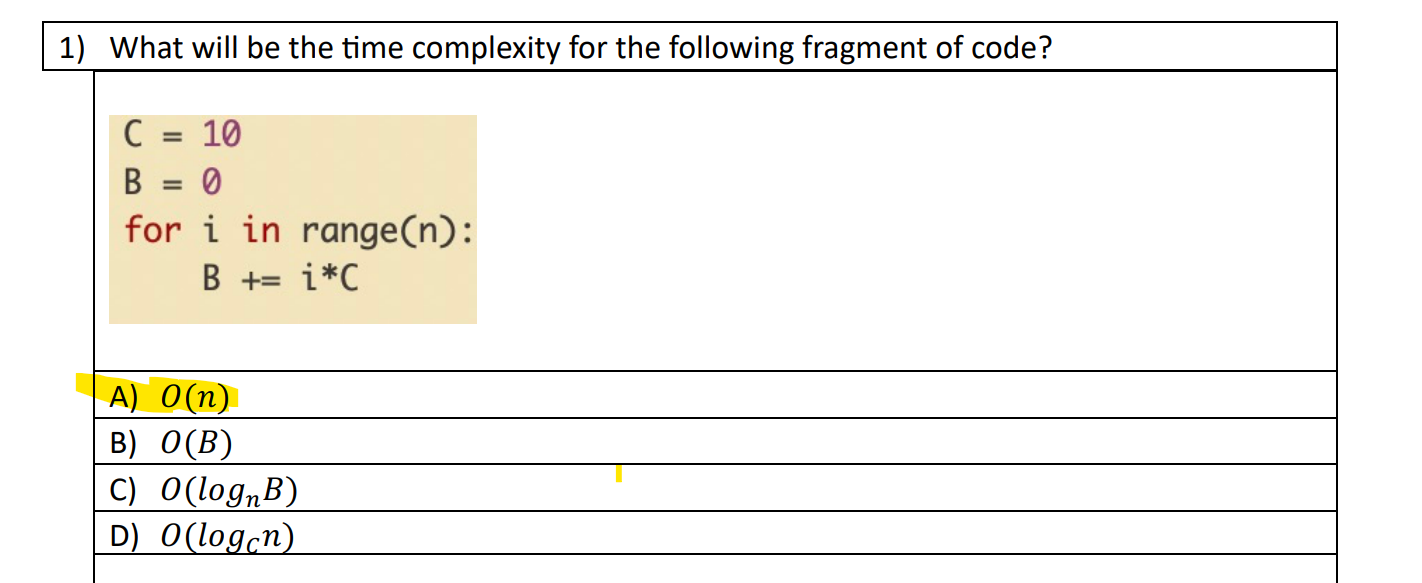

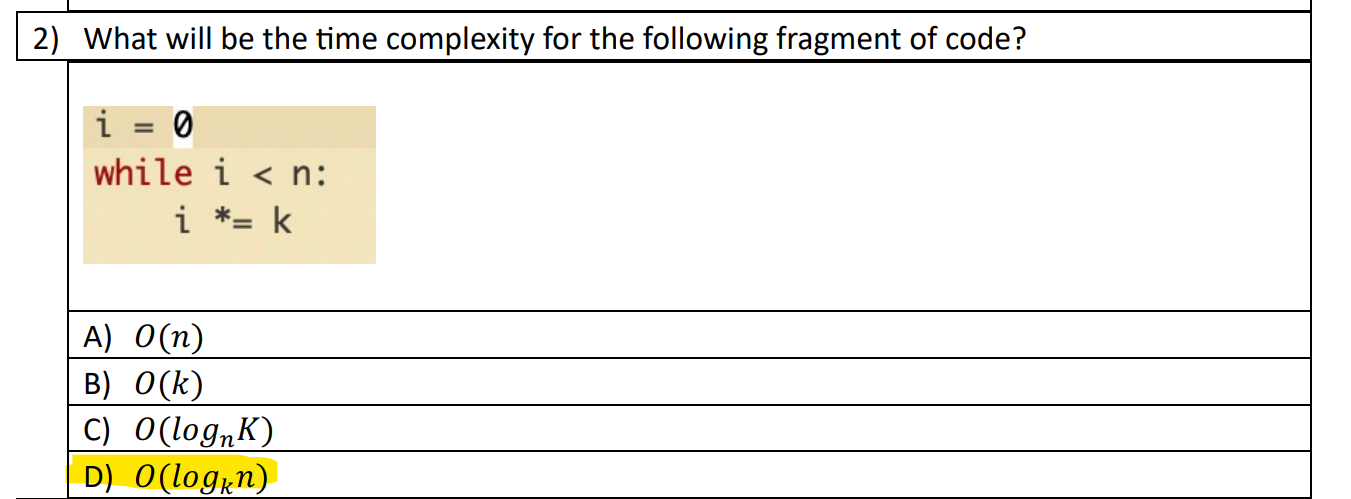

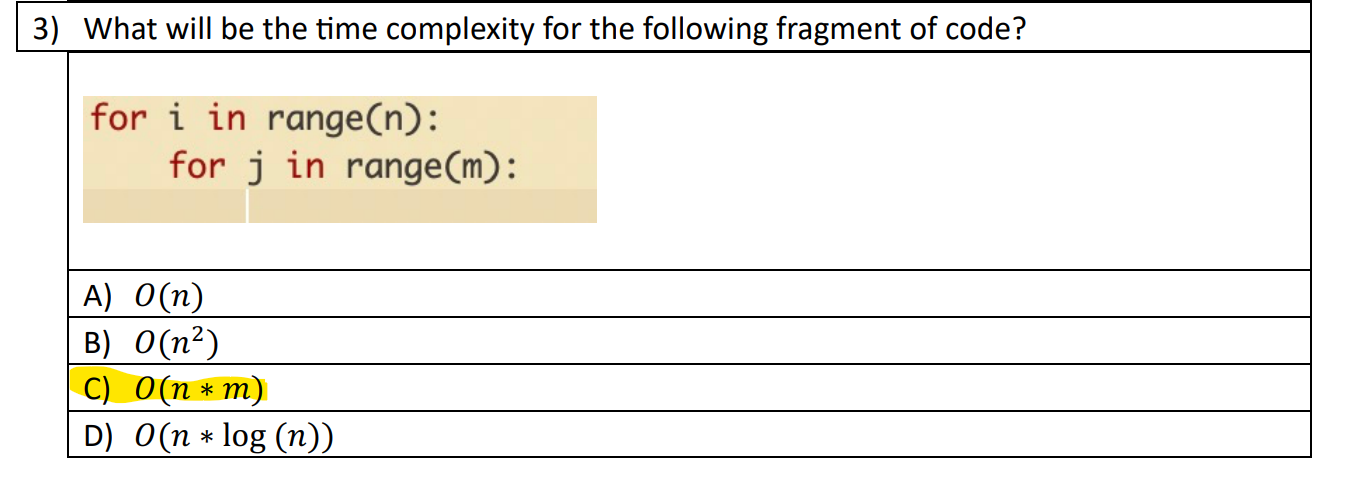